In [1]:
datapath = "datasets/housing/housing.csv"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk

In [3]:
full_df = pd.read_csv(datapath)

## Feel the data: Getting hold of initial information about data and its structure



In [4]:
#returns initial data of specified rows
full_df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [5]:
# returns data shape
full_df.shape

(20640, 10)

In [6]:
#gives headers

full_df.columns


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [7]:
#to get information about column headers, no of non-null data and Data types

full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
#to obtain basic statistical information about data
full_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
full_df['ocean_proximity'].count()

20640

In [10]:
print(full_df['ocean_proximity'].dtype)  #getting hold of data types in each column

print(full_df['total_rooms'].dtype)

object
float64


In [11]:
#getting hold of what items are present in ocean proximity

full_df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

so there are 4 types of values present in that column: Inland, Near Ocean,  Near Bay and Island

In [12]:
full_df['ocean_proximity'].values

array(['NEAR BAY', 'NEAR BAY', 'NEAR BAY', ..., 'INLAND', 'INLAND',
       'INLAND'], dtype=object)

#### Another way of getting a bit feel of data distribution and type is by using plots

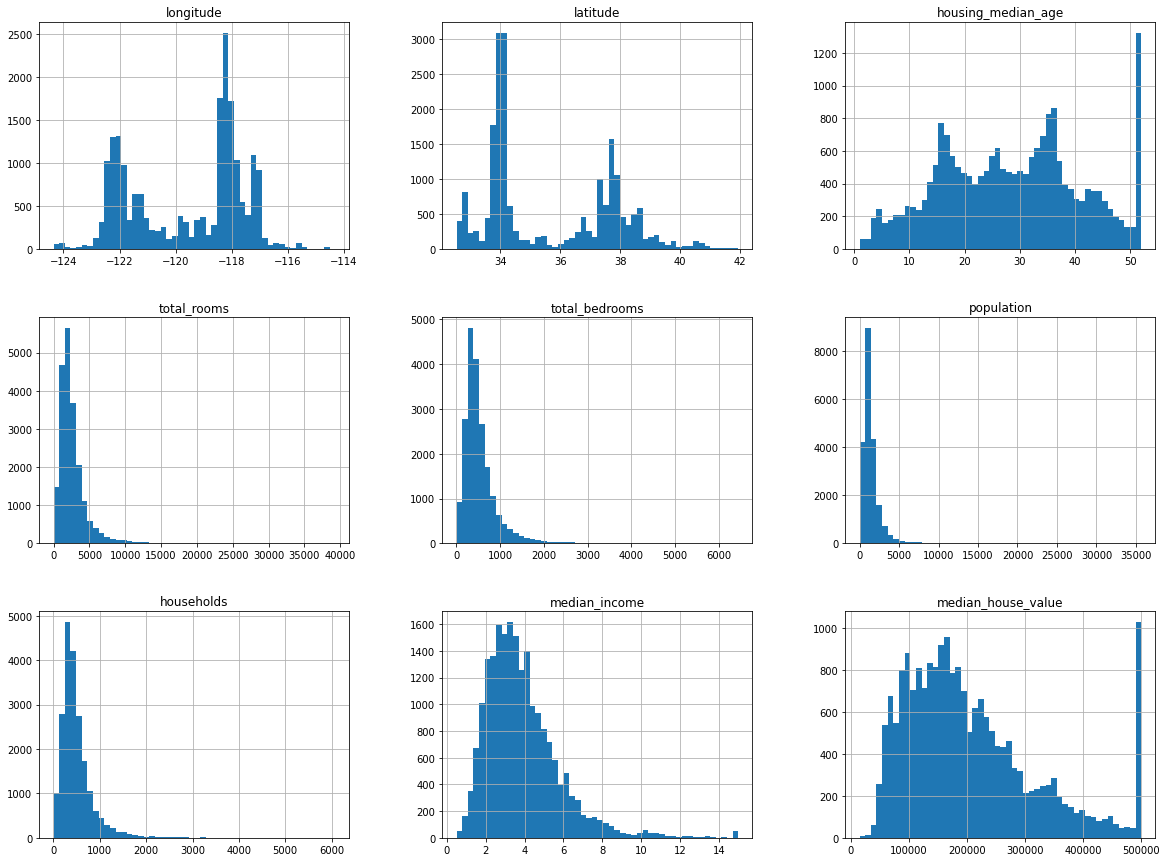

In [13]:
full_df.hist(bins=50, figsize=(20,15))
plt.show()

In [14]:
len(full_df)

20640

In [15]:
np.random.permutation(10)

array([7, 8, 5, 6, 0, 4, 9, 2, 3, 1])

### Creating test-train-split data sets

In [16]:
#input full data and return a set of train data and test data set respectively with given test ratio
def my_test_train_split(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_size]
    train_indices = shuffled_indices[test_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

note that `iloc` function is pandas method to return values based on predefined set of indices 

### using scikit learn test train method

In [17]:
#using scikit
from sklearn.model_selection import train_test_split #importing

train_set, test_set = train_test_split(full_df, test_size=.2, random_state=42)
print(train_set.shape)
print(test_set.shape)

(16512, 10)
(4128, 10)


In [18]:
# using our function

my_train, my_test = my_test_train_split(full_df, test_ratio=.2)
print(my_train.shape)
print(my_test.shape)

(16512, 10)
(4128, 10)


## Importance of stratified sampling

<b>example:</b> When a survey company decides to call 1,000 people to ask them a few questions, they don’t just pick
1,000 people randomly in a phone book. They try to ensure that these 1,000 people
are representative of the whole population. For example, the US population is 51.3%
females and 48.7% males, so a well-conducted survey in the US would try to maintain
this ratio in the sample: 513 female and 487 male. This is called stratified sampling:
the population is divided into homogeneous subgroups called strata, and the right
number of instances are sampled from each stratum to guarantee that the test set is
representative of the overall population.

In [19]:
full_df["income_cat"] = pd.cut(full_df["median_income"],bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=['very_low', 'low', 'medium', 'high', 'very_high'])
#it creates a category out of continuous data set in pandas column and adds a completely new column: income_cat
#bins = seperating values
#labels to identify those value sets
#can also use labels like [1, 2, 3, 4, 5] as given in book instead of text strings

In [20]:
full_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,very_high
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,very_high
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,very_high
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,high
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,medium


In [21]:
full_df[['median_income', 'income_cat']].head(10)

,median_income,income_cat
0,8.3252,very_high
1,8.3014,very_high
2,7.2574,very_high
3,5.6431,high
4,3.8462,medium
5,4.0368,medium
6,3.6591,medium
7,3.1200,medium
8,2.0804,low
9,3.6912,medium


<AxesSubplot: >

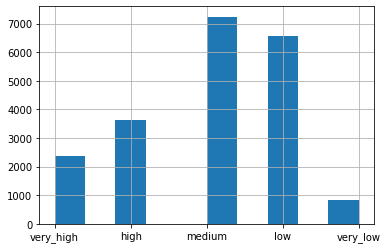

In [22]:
full_df['income_cat'].hist()

### Splitting the data based on our original dataframe to get representative sample 
using `StratifiedShuffleSplit`

In [23]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [24]:
for train_index, test_index in split.split(full_df, full_df['income_cat']):
    stratified_train_set = full_df.loc[train_index]
    stratified_test_set = full_df.loc[test_index]


<AxesSubplot: >

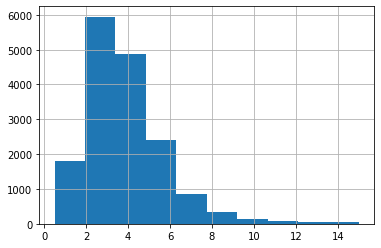

In [25]:
stratified_train_set['median_income'].hist()

<AxesSubplot: >

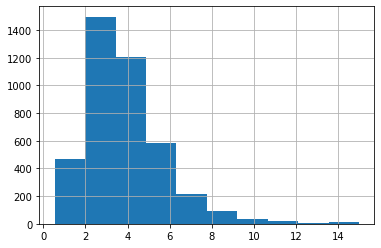

In [26]:
stratified_test_set['median_income'].hist()

<AxesSubplot: >

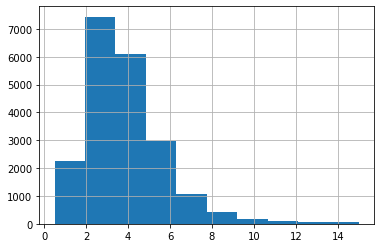

In [27]:
full_df['median_income'].hist()

### Lets check the distribution of each category 

In [28]:
full_df['income_cat'].value_counts()/full_df['income_cat'].count()

medium       0.350581
low          0.318847
high         0.176308
very_high    0.114438
very_low     0.039826
Name: income_cat, dtype: float64

In [29]:
stratified_train_set['income_cat'].value_counts()/stratified_train_set['income_cat'].count()

medium       0.350594
low          0.318859
high         0.176296
very_high    0.114462
very_low     0.039789
Name: income_cat, dtype: float64

In [30]:
stratified_test_set['income_cat'].value_counts()/stratified_test_set['income_cat'].count()

medium       0.350533
low          0.318798
high         0.176357
very_high    0.114341
very_low     0.039971
Name: income_cat, dtype: float64

In [31]:
#all category have equal propotions so we have now obtained stratified dataset
#lets compare with random set too


In [32]:
random_train, random_test = my_test_train_split(full_df, test_ratio=.2)

In [33]:
random_train['income_cat'].value_counts()/random_train['income_cat'].count()

medium       0.351139
low          0.320373
high         0.174116
very_high    0.114220
very_low     0.040153
Name: income_cat, dtype: float64

In [34]:
random_test['income_cat'].value_counts()/random_test['income_cat'].count()

medium       0.348353
low          0.312742
high         0.185078
very_high    0.115310
very_low     0.038517
Name: income_cat, dtype: float64

In [35]:
#this shows variation is high from initial data size
#we should also drop the unwanted label from dataframe using .drop

In [36]:
my_test.drop('longitude', axis=1, inplace=True)

c:\users\paude\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [37]:
my_test

,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14641,32.79,29.0,1213.0,NaN,654.0,246.0,4.5987,255600.0,NEAR OCEAN
9501,38.80,17.0,5202.0,1037.0,1742.0,803.0,3.1201,176100.0,NEAR OCEAN
19179,38.43,29.0,488.0,63.0,161.0,62.0,6.0774,334400.0,<1H OCEAN
8701,33.86,28.0,2075.0,463.0,1216.0,446.0,3.9732,281500.0,<1H OCEAN
18457,37.23,18.0,3179.0,526.0,1663.0,507.0,5.9225,265800.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
20252,34.22,26.0,3175.0,736.0,2460.0,775.0,3.1250,219900.0,NEAR OCEAN
20293,34.16,30.0,2053.0,368.0,1496.0,391.0,3.6546,186200.0,NEAR OCEAN
10366,33.60,19.0,3913.0,460.0,1646.0,454.0,7.2147,303900.0,<1H OCEAN
17812,37.39,17.0,1777.0,328.0,1235.0,329.0,5.4225,258100.0,<1H OCEAN


c:\users\paude\appdata\local\programs\python\python38\lib\site-packages\pandas\plotting\_matplotlib\core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='latitude', ylabel='longitude'>

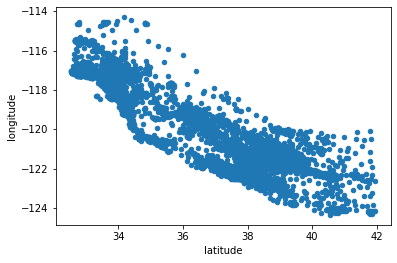

In [38]:
#seeing geographical location
full_df.plot(kind="scatter", x="latitude", y="longitude")

#### more data visualization at one place

Now let’s look at the housing prices (Figure 2-13). The radius of each circle represents
the district’s population (option s), and the color represents the price (option c). We
will use a predefined color map (option cmap) called jet, which ranges from blue
(low values) to red (high prices)

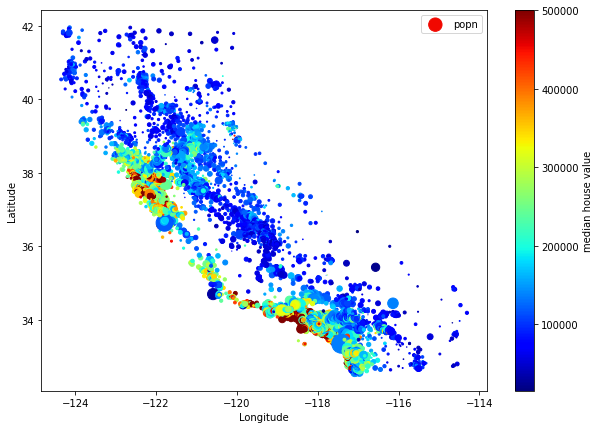

In [39]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot()
sc = ax.scatter(full_df['longitude'], full_df['latitude'], s=full_df['population']/100, 
           c=full_df['median_house_value'], cmap=plt.get_cmap("jet"), label="popn")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.colorbar(sc, label="median house value")
plt.legend()
plt.show()

### fact:
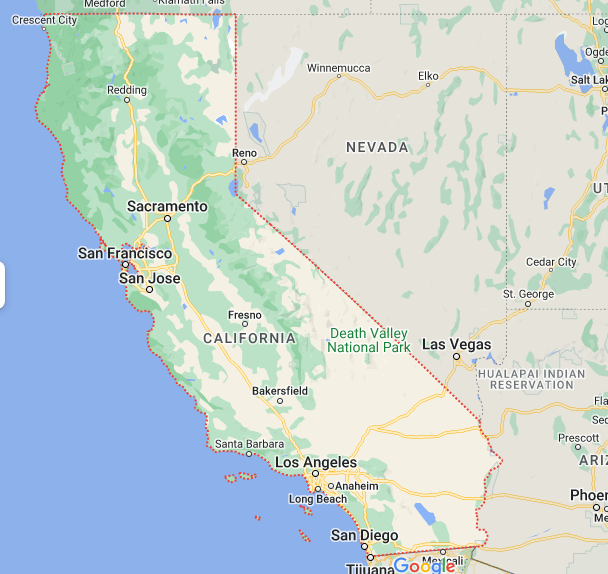
this image is political map of California, USA and data are also from this state. We can see where are high housing prices

## Correlation between features

In [40]:
full_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_cat'],
      dtype='object')

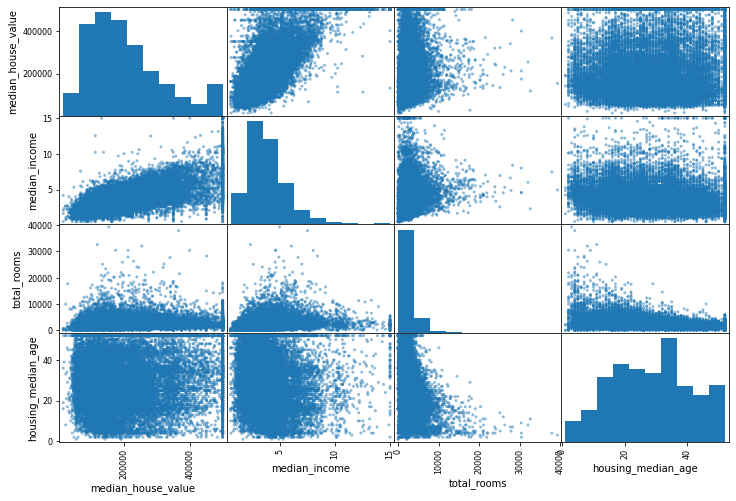

In [41]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(full_df[attributes], figsize=(12, 8))
plt.show()

### This plot shows that, one of the influencing factors might be median_income which shows high correlation

### Preparing Data for Machine Learning Algorithms

In [42]:
housing = stratified_train_set.drop("median_house_value", axis=1) #.drop will not change original df if we are not specifying inplace=True
housing_labels = stratified_train_set["median_house_value"].copy()

In [43]:
housing_labels


16126    500001.0
17709    175800.0
2501      58000.0
2123      72000.0
2144      72300.0
           ...   
3382     230100.0
841      156300.0
11749    217500.0
3940     227700.0
18827     61400.0
Name: median_house_value, Length: 16512, dtype: float64

### Data Cleaning:
Removal of missing datas. This is must for scikit learning

1. Get rid of the corresponding districts.
> `housing.dropna(subset=["total_bedrooms"])` 
2. Get rid of the whole attribute.
> `housing.drop("total_bedrooms", axis=1)`
3. Set the values to some value (zero, the mean, the median, etc.).
> `median = housing["total_bedrooms"].median() # option 3`
> ` housing["total_bedrooms"].fillna(median, inplace=True)`


In [46]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
8383,-118.36,33.96,26.0,3543.0,NaN,2742.0,951.0,2.5504,<1H OCEAN,low
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN,medium
11311,-117.96,33.78,33.0,1520.0,NaN,658.0,242.0,4.8750,<1H OCEAN,high
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,NEAR BAY,medium
15137,-116.91,32.83,16.0,5203.0,NaN,2515.0,862.0,4.1050,<1H OCEAN,medium


In [47]:
#using imputer to fill and handle those medians


In [57]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [58]:
housing_num = housing.drop("ocean_proximity", axis=1)
# alternatively: housing_num = housing.select_dtypes(include=[np.number])

In [59]:
imputer.fit(housing_num)

ValueError: Cannot use median strategy with non-numeric data:
could not convert string to float: 'low'

In [60]:
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
16126,-122.47,37.79,52.0,437.0,105.0,194.0,87.0,2.8125,low
17709,-121.82,37.33,23.0,3279.0,647.0,2582.0,630.0,4.3782,medium
2501,-120.38,36.76,25.0,991.0,272.0,941.0,262.0,1.8125,low
2123,-119.71,36.76,28.0,2675.0,527.0,1392.0,521.0,2.3108,low
2144,-119.76,36.77,36.0,2507.0,466.0,1227.0,474.0,2.7850,low
...,...,...,...,...,...,...,...,...,...
3382,-118.27,34.25,35.0,779.0,143.0,371.0,150.0,4.6635,high
841,-122.08,37.59,16.0,1816.0,365.0,1367.0,355.0,4.2350,medium
11749,-121.15,38.80,20.0,2104.0,370.0,745.0,314.0,4.1685,medium
3940,-118.59,34.21,34.0,1943.0,320.0,895.0,305.0,5.0462,high


In [61]:
#so previous error was due to text attribute, so we again delete those texts in income_cat
housing_num.drop("income_cat", axis=1, inplace=True)

In [63]:
#now we can apply imputer fit
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [64]:
imputer.statistics_

array([-118.5   ,   34.26  ,   29.    , 2137.    ,  437.    , 1170.    ,
        411.    ,    3.5377])

In [65]:
housing_num.median().values

array([-118.5   ,   34.26  ,   29.    , 2137.    ,  437.    , 1170.    ,
        411.    ,    3.5377])

Transforming the training set

In [69]:
X = imputer.transform(housing_num)

In [70]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index)

In [72]:
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
8383,-118.36,33.96,26.0,3543.0,437.0,2742.0,951.0,2.5504
10915,-117.87,33.73,45.0,2264.0,437.0,1970.0,499.0,3.4193
11311,-117.96,33.78,33.0,1520.0,437.0,658.0,242.0,4.8750
696,-122.10,37.69,41.0,746.0,437.0,387.0,161.0,3.9063
15137,-116.91,32.83,16.0,5203.0,437.0,2515.0,862.0,4.1050


In [73]:
imputer.strategy

'median'

In [74]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

In [75]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
16126,-122.47,37.79,52.0,437.0,105.0,194.0,87.0,2.8125
17709,-121.82,37.33,23.0,3279.0,647.0,2582.0,630.0,4.3782
2501,-120.38,36.76,25.0,991.0,272.0,941.0,262.0,1.8125
2123,-119.71,36.76,28.0,2675.0,527.0,1392.0,521.0,2.3108
2144,-119.76,36.77,36.0,2507.0,466.0,1227.0,474.0,2.7850
...,...,...,...,...,...,...,...,...
3382,-118.27,34.25,35.0,779.0,143.0,371.0,150.0,4.6635
841,-122.08,37.59,16.0,1816.0,365.0,1367.0,355.0,4.2350
11749,-121.15,38.80,20.0,2104.0,370.0,745.0,314.0,4.1685
3940,-118.59,34.21,34.0,1943.0,320.0,895.0,305.0,5.0462


In [76]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
16126,-122.47,37.79,52.0,437.0,105.0,194.0,87.0,2.8125
17709,-121.82,37.33,23.0,3279.0,647.0,2582.0,630.0,4.3782
2501,-120.38,36.76,25.0,991.0,272.0,941.0,262.0,1.8125
2123,-119.71,36.76,28.0,2675.0,527.0,1392.0,521.0,2.3108
2144,-119.76,36.77,36.0,2507.0,466.0,1227.0,474.0,2.7850


In [77]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
16126,-122.47,37.79,52.0,437.0,105.0,194.0,87.0,2.8125,NEAR BAY,low
17709,-121.82,37.33,23.0,3279.0,647.0,2582.0,630.0,4.3782,<1H OCEAN,medium
2501,-120.38,36.76,25.0,991.0,272.0,941.0,262.0,1.8125,INLAND,low
2123,-119.71,36.76,28.0,2675.0,527.0,1392.0,521.0,2.3108,INLAND,low
2144,-119.76,36.77,36.0,2507.0,466.0,1227.0,474.0,2.7850,INLAND,low
...,...,...,...,...,...,...,...,...,...,...
3382,-118.27,34.25,35.0,779.0,143.0,371.0,150.0,4.6635,<1H OCEAN,high
841,-122.08,37.59,16.0,1816.0,365.0,1367.0,355.0,4.2350,NEAR BAY,medium
11749,-121.15,38.80,20.0,2104.0,370.0,745.0,314.0,4.1685,INLAND,medium
3940,-118.59,34.21,34.0,1943.0,320.0,895.0,305.0,5.0462,<1H OCEAN,high


#### Now replacing ocean proximity text attributes (there are categorical attributes as they are fixed in number and are categorical too)
We are using `OrdinalEncoder` for this

In [78]:
housing_cat = housing[["ocean_proximity"]]
housing_cat

,ocean_proximity
16126,NEAR BAY
17709,<1H OCEAN
2501,INLAND
2123,INLAND
2144,INLAND
...,...
3382,<1H OCEAN
841,NEAR BAY
11749,INLAND
3940,<1H OCEAN


In [79]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded


array([[3.],
       [0.],
       [1.],
       ...,
       [1.],
       [0.],
       [1.]])

In [80]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### IMPORTANT:
One issue with this representation is that ML algorithms will assume that two nearby
values are more similar than two distant values. This may be fine in some cases (e.g.,
for ordered categories such as “bad,” “average,” “good,” and “excellent”), but it is obvi‐
ously not the case for the ocean_proximity column (for example, categories 0 and 4
are clearly more similar than categories 0 and 1). To fix this issue, a common solution is to create one binary attribute per category: one attribute equal to 1 when the cate‐
gory is “<1H OCEAN” (and 0 otherwise), another attribute equal to 1 when the cate‐
gory is “INLAND” (and 0 otherwise), and so on. This is called one-hot encoding,
because only one attribute will be equal to 1 (hot), while the others will be 0 (cold)

In [81]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot #output is in form of scipy sparse matrix so now we convert them into array of numpy

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [82]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [83]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### Custom Transformers
we will learn more later on

Making our own custom transformers to get another form of useful data from one set of data

In [88]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [89]:
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names] # get the column indices

In [90]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,rooms_per_household,population_per_household
16126,-122.47,37.79,52.0,437.0,105.0,194.0,87.0,2.8125,NEAR BAY,low,5.022989,2.229885
17709,-121.82,37.33,23.0,3279.0,647.0,2582.0,630.0,4.3782,<1H OCEAN,medium,5.204762,4.098413
2501,-120.38,36.76,25.0,991.0,272.0,941.0,262.0,1.8125,INLAND,low,3.782443,3.591603
2123,-119.71,36.76,28.0,2675.0,527.0,1392.0,521.0,2.3108,INLAND,low,5.134357,2.671785
2144,-119.76,36.77,36.0,2507.0,466.0,1227.0,474.0,2.785,INLAND,low,5.28903,2.588608


### Feature Scaling
There are two common ways to get all attributes to have the same scale: 
- min-max scaling 
- standardization.

This is done where data have very different ranges of values.

1. **Min Max Scaling (Normalization)**
    - Subtracts all the values by minimum value and then divides by (max - min) 
    - Transforming all values so that values end up between range 0 to 1
    - Scikit-Learn provides a trans‐ former called `MinMaxScaler` for this. It has a `feature_range` hyperparameter that lets you change the range if, for some reason, you don’t want 0–1.

2. **Standardization**
    - Standardization is different: first it subtracts the mean value (so standardized values always have a zero mean), and then it divides by the standard deviation so that the resulting distribution has unit variance.
     - `Scikit-Learn` provides a transformer called `StandardScaler` for standardization

In [92]:
#applying transformation pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [93]:
housing_num_tr

array([[-1.44853912,  1.00749818,  1.85039146, ..., -0.17421299,
        -0.0747307 ,  0.39884721],
       [-1.12372214,  0.79232875, -0.44842016, ..., -0.09519615,
         0.08666015, -0.24965501],
       [-0.40412761,  0.52570577, -0.28988143, ..., -0.71347777,
         0.04288535,  0.9150669 ],
       ...,
       [-0.78891079,  1.47993539, -0.68622826, ...,  0.55506018,
        -0.06240295, -0.57362789],
       [ 0.49036838, -0.66708125,  0.42354287, ...,  0.41154621,
        -0.01387717, -0.74212632],
       [-1.34359825,  2.81772789, -0.92403636, ...,  0.14049334,
        -0.01637668, -0.4253712 ]])

In [94]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [95]:
housing_prepared

array([[-1.44853912,  1.00749818,  1.85039146, ...,  0.        ,
         1.        ,  0.        ],
       [-1.12372214,  0.79232875, -0.44842016, ...,  0.        ,
         0.        ,  0.        ],
       [-0.40412761,  0.52570577, -0.28988143, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.78891079,  1.47993539, -0.68622826, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.49036838, -0.66708125,  0.42354287, ...,  0.        ,
         0.        ,  0.        ],
       [-1.34359825,  2.81772789, -0.92403636, ...,  0.        ,
         0.        ,  0.        ]])

In [97]:
housing_prepared.shape

(16512, 16)

### Training and Evaluating on the Training Set

In [98]:
from sklearn.linear_model import LinearRegression

In [99]:
lin_reg = LinearRegression()


In [103]:
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()